In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import tsv data with header
df = pd.read_csv('data/final_datasets/aggregated_dataset.tsv', sep=';')

/Users/askemeineche/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# Create week column
df['week'] = pd.to_datetime(df['date']).dt.week
# Make week 52 to 0
df['week'] = df['week'].replace(52, 0)

/var/folders/b4/cwqn8hyj67100247892j531w0000gn/T/ipykernel_6761/31278531.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = pd.to_datetime(df['date']).dt.week


In [5]:
df.head()

,date,corpus,text_type,conflict,similarity,knowledge,power,status,support,identity,romance,trust,fun,High,Low,Mean,event_id,event_type,period_type,week
0,2022-03-06,sarn sauron coin bsc gem of 2022 launch now e...,post,0.217982,0.008616,0.987545,0.095460,0.210643,0.012049,0.401652,0.004092,8.436824e-07,0.404854,39640.176751,38211.647962,38925.912357,1.0,positive,before,9
1,2022-03-06,a proposal to you removed,post,0.503045,0.435572,0.485023,0.518171,0.427520,0.495435,0.432057,0.254124,3.306695e-01,0.453298,39640.176751,38211.647962,38925.912357,1.0,positive,before,9
2,2022-03-06,time to buy nan,post,0.315845,0.453668,0.491014,0.467255,0.453663,0.485220,0.443327,0.571401,4.674791e-01,0.595824,39640.176751,38211.647962,38925.912357,1.0,positive,before,9
3,2022-03-06,stupid question please excuse my ignorance can...,post,0.685344,0.003814,0.995469,0.033478,0.095750,0.000713,0.207318,0.000114,8.855732e-07,0.099581,39640.176751,38211.647962,38925.912357,1.0,positive,before,9
4,2022-03-06,bitcoin nan,post,0.488357,0.469591,0.483014,0.434496,0.515467,0.484323,0.482162,0.507920,5.038089e-01,0.523179,39640.176751,38211.647962,38925.912357,1.0,positive,before,9


In [6]:
def calculate_zscore(df, dimension, threshold = 0.5):
    f_scores = [] 
    # iterate over each week 
    for week in sorted(df['week'].unique()):

        # Count how many texts exceeds the threshold
        n_wihtin_dim = df[(df['week'] == week) & (df[dimension] > threshold)].shape[0]
        # Compute the fraction of texts that exceed the threshold
        f = n_wihtin_dim / df[df['week'] == week].shape[0]
        # Append the fraction to the list
        f_scores.append((week, f))

    # Compute the mean and standard deviation of the fractions
    mean = np.mean([f[1] for f in f_scores])
    std = np.std([f[1] for f in f_scores])

    # Compute the z-scores
    z_scores = [(f[0], (f[1] - mean) / std) for f in f_scores]
    return z_scores  

In [11]:
# Create a new dataframe with z-scores
z_scores = pd.DataFrame(columns = df.columns[3:13], index = sorted(df['week'].unique()))

for dimension in df.columns[3:13]:
    z_s = calculate_zscore(df, dimension)
    z_scores[dimension] = [z[1] for z in z_s]


In [14]:
# Make a date column from week index in the z-scores dataframe
import datetime
mondays = [datetime.datetime.strptime("2022-W" + str(int(w)) + '-1', "%Y-W%W-%w").date() for w in z_scores.index]
sundays = [datetime.datetime.strptime("2022-W" + str(int(w)) + '-0', "%Y-W%W-%w").date() for w in z_scores.index]
z_scores['date'] = [str(m) + ' - ' + str(s) for m, s in zip(mondays, sundays)]

In [15]:
z_scores

,conflict,similarity,knowledge,power,status,support,identity,romance,trust,fun,date
0,-3.013080,0.063347,2.611241,-4.293999,0.058754,2.233962,-3.528539,-2.176769,0.492573,-2.195353,2021-12-27 - 2022-01-02
1,0.860803,1.281931,-0.164164,0.159261,0.718849,0.102100,-1.537784,1.673250,-1.311629,1.789169,2022-01-03 - 2022-01-09
2,0.359675,0.964453,-0.108456,0.342983,0.011036,0.550980,-0.336582,-0.504367,-0.533733,-0.156614,2022-01-10 - 2022-01-16
3,-0.267622,0.156060,-0.052747,-0.483769,-0.539485,0.415381,-0.413129,-0.791526,0.605815,0.188681,2022-01-17 - 2022-01-23
4,1.672259,0.278441,-0.853189,0.319249,0.184885,-0.681962,0.851603,-0.756261,-0.824636,0.154299,2022-01-24 - 2022-01-30
5,0.366784,0.238370,-0.345217,1.133548,0.994109,-0.599273,0.205136,1.023155,-0.182316,1.870827,2022-01-31 - 2022-02-06
6,0.561150,-0.152993,0.631147,-0.076914,-0.433727,-1.431378,-0.037208,0.290676,-1.417782,0.314507,2022-02-07 - 2022-02-13
7,1.996336,-0.029135,0.158480,1.386863,-1.090006,-1.875774,1.524102,1.581519,-1.639163,0.400991,2022-02-14 - 2022-02-20
8,1.057507,-0.305839,0.836742,0.673731,-0.951892,-0.253605,1.386158,0.063081,-0.158888,-0.334976,2022-02-21 - 2022-02-27
9,1.583884,-0.601661,0.676112,0.578316,-0.652369,-0.047725,0.816453,2.261470,-0.589417,0.140355,2022-02-28 - 2022-03-06


<AxesSubplot: xlabel='date'>

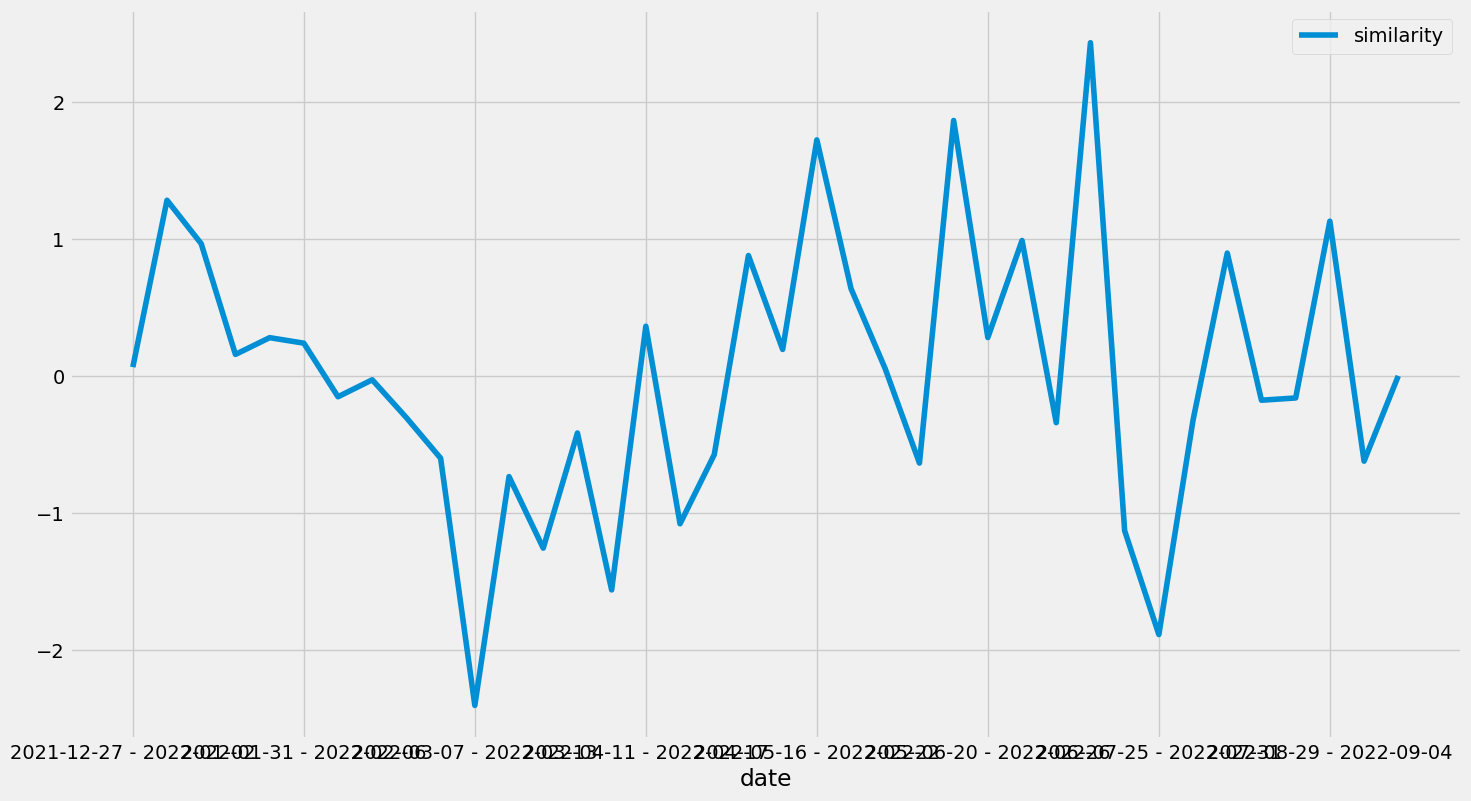

In [60]:
plt.style.use('fivethirtyeight')
z_scores.plot(x='date',y='similarity',figsize=[16,9])

In [38]:
events = df[["date","event_type","period_type", "event_id"]].drop_duplicates().dropna()
# Group by event_type, period_type and event_id and make a date range

hep = events.groupby(["event_type","period_type", "event_id"]).agg({"date": [min, max]}).reset_index()
# make min and max date
hep["min_date"] = hep["date"]["min"]
hep["max_date"] = hep["date"]["max"]

# make a date range
#hep["date_range"] = hep.apply(lambda x: str(x["min_date"].date()) + " - " +  str(x["max_date"].date())), axis=1)


# remove date, min_date and max_date columns
#hep = hep.drop(["date", "min_date", "max_date"], axis=1)
#print(hep)
hep.drop('date',axis=1,inplace=True)
hep = pd.DataFrame({col:hep[col].values.tolist() for col in hep.columns})
hep

/Users/askemeineche/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,event_type,period_type,event_id,min_date,max_date
,,,,,
0,negative,after,4.0,2022-06-19,2022-07-01
1,negative,after,5.0,2022-05-13,2022-05-19
2,negative,after,6.0,2022-01-23,2022-01-30
3,negative,before,4.0,2022-06-02,2022-06-07
4,negative,before,5.0,2022-04-28,2022-05-04
5,negative,before,6.0,2022-01-13,2022-01-18
6,negative,during,4.0,2022-06-08,2022-06-18
7,negative,during,5.0,2022-05-05,2022-05-12
8,negative,during,6.0,2022-01-19,2022-01-22


In [52]:
hep['date_range'] = [' - '.join([row['min_date'].values[0],row['max_date'].values[0]]) for k, row in hep.iterrows()]
hep.sort_values('min_date')

,event_type,period_type,event_id,min_date,max_date,date_range
,,,,,,
5,negative,before,6.0,2022-01-13,2022-01-18,2022-01-13 - 2022-01-18
8,negative,during,6.0,2022-01-19,2022-01-22,2022-01-19 - 2022-01-22
2,negative,after,6.0,2022-01-23,2022-01-30,2022-01-23 - 2022-01-30
13,positive,before,2.0,2022-01-28,2022-02-03,2022-01-28 - 2022-02-03
16,positive,during,2.0,2022-02-04,2022-02-09,2022-02-04 - 2022-02-09
10,positive,after,2.0,2022-02-10,2022-02-16,2022-02-10 - 2022-02-16
14,positive,before,3.0,2022-02-24,2022-02-27,2022-02-24 - 2022-02-27
17,positive,during,3.0,2022-02-28,2022-03-01,2022-02-28 - 2022-03-01
11,positive,after,3.0,2022-03-02,2022-03-07,2022-03-02 - 2022-03-07


In [53]:
z_scores.head()

,conflict,similarity,knowledge,power,status,support,identity,romance,trust,fun,date
0,-3.013080,0.063347,2.611241,-4.293999,0.058754,2.233962,-3.528539,-2.176769,0.492573,-2.195353,2021-12-27 - 2022-01-02
1,0.860803,1.281931,-0.164164,0.159261,0.718849,0.102100,-1.537784,1.673250,-1.311629,1.789169,2022-01-03 - 2022-01-09
2,0.359675,0.964453,-0.108456,0.342983,0.011036,0.550980,-0.336582,-0.504367,-0.533733,-0.156614,2022-01-10 - 2022-01-16
3,-0.267622,0.156060,-0.052747,-0.483769,-0.539485,0.415381,-0.413129,-0.791526,0.605815,0.188681,2022-01-17 - 2022-01-23
4,1.672259,0.278441,-0.853189,0.319249,0.184885,-0.681962,0.851603,-0.756261,-0.824636,0.154299,2022-01-24 - 2022-01-30


In [48]:
for k,row in hep.iterrows():
    print(row['min_date'].values[0])
    break

2022-06-19
